<a href="https://colab.research.google.com/github/sathundorn/Statistical-Learning-Labs1/blob/main/670510773_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("/content/heartdeseat.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]
          }

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

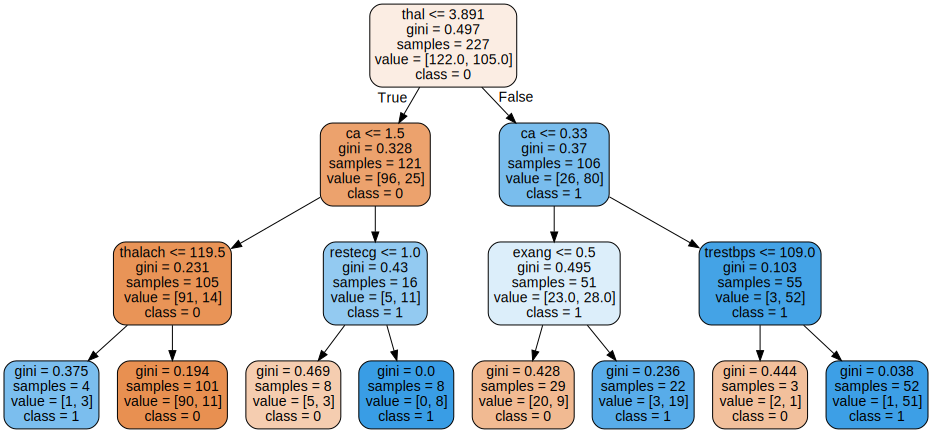

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [7]:
from sklearn.metrics import classification_report
y_pred = gridcv.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.72      0.74      0.73        42
           1       0.67      0.65      0.66        34

    accuracy                           0.70        76
   macro avg       0.69      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [12]:
clf = DecisionTreeClassifier()

bagged_tress = BaggingClassifier(clf, n_estimators=100,max_samples=X_train.shape[0],max_features=5)
bagged_tress.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=227, n_estimators=100)

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [8]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [35]:
parameter = {'max_depth': [1,3, 5, 7]}
parameter2 = {'max_depth': [2,4, 6, 8]}
parameter3 = {'max_depth': [5,10, 15, 20]}
gridcv1 = GridSearchCV(clf, parameter, scoring='accuracy', cv=5)
gridcv2 = GridSearchCV(clf, parameter2, scoring='accuracy', cv=5)
gridcv3 = GridSearchCV(clf, parameter3, scoring='accuracy', cv=5)
gridcv1.fit(X_train, y_train)
gridcv2.fit(X_train, y_train)
gridcv3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20]}, scoring='accuracy')

In [49]:
gridcv1.best_estimator_
gridcv2.best_estimator_
gridcv3.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [37]:
from sklearn.metrics import classification_report
y_pred = gridcv1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        42
           1       0.67      0.65      0.66        34

    accuracy                           0.70        76
   macro avg       0.69      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



In [38]:
y_pred = gridcv2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.75      0.71      0.73        34

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



In [39]:
y_pred = gridcv3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.74      0.68      0.71        34

    accuracy                           0.75        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76



In [40]:
clf = DecisionTreeClassifier()

bagged_tress1 = BaggingClassifier(clf, n_estimators=100,max_samples=X_train.shape[0],max_features=5)
bagged_tress2 = BaggingClassifier(clf, n_estimators=200,max_samples=X_train.shape[0],max_features=10)
bagged_tress3 = BaggingClassifier(clf, n_estimators=300,max_samples=X_train.shape[0],max_features=5)
bagged_tress1.fit(X_train, y_train)
bagged_tress2.fit(X_train, y_train)
bagged_tress3.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=227, n_estimators=300)

In [41]:
y_pred = bagged_tress1.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.79      0.79      0.79        34

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [42]:
y_pred = bagged_tress2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.77      0.79      0.78        34

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [43]:
y_pred = bagged_tress3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.82      0.79      0.81        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [45]:
rf1 = RandomForestClassifier(n_estimators=300)
rf2 = RandomForestClassifier(n_estimators=200)
rf3 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)
rf3.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.82      0.79      0.81        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [47]:
y_pred = rf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.84      0.79      0.82        34

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [48]:
y_pred = rf3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.77      0.79      0.78        34

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



What is your best model?

Random forest เป็นโมเดลที่ดีที่สุดที่ parameter จำนวนต้นไม้ = 200 ต้น

ในงานนี้เลือกใช้โมเดล Random Forest เป็นโมเดลที่ดีที่สุด โดยกำหนดให้มี ต้นไม้จำนวน 200 ต้น
เนื่องจากการเพิ่มจำนวนต้นไม้ช่วยลดความแปรปรวนของโมเดล ทำให้ผลการทำนายมีความเสถียรมากขึ้น
เมื่อจำนวนต้นไม้เพิ่มขึ้น

Best tree model

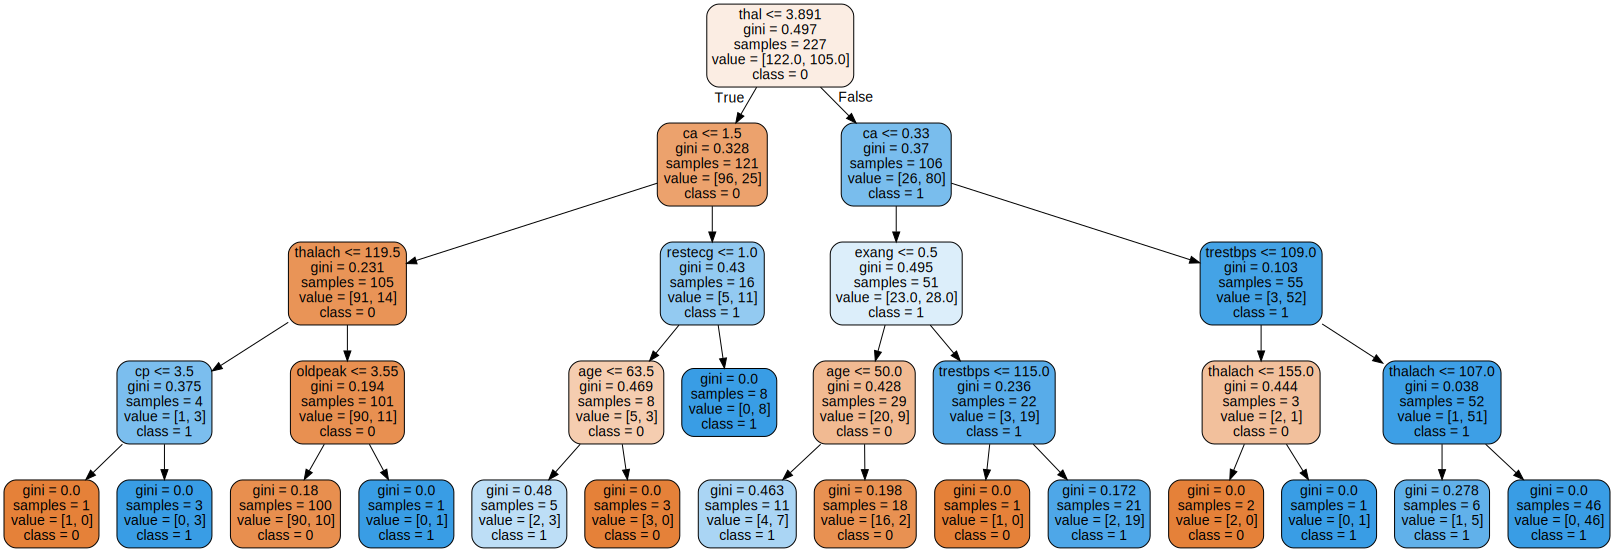

In [50]:
plot_data = export_graphviz(gridcv2.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph